In [2]:
from shapesynthesis.loaders import load_model, load_config

config, _ = load_config("../configs/encoder_128_airplane.yaml")

# config
model = load_model(config.modelconfig,"../trained_models/encoder_128_airplane.ckpt")

Warp CUDA error 100: no CUDA-capable device is detected (in function init_cuda_driver, /builds/omniverse/warp/warp/native/cuda_util.cpp:266)
Warp CUDA error 3: initialization error (in function cuda_device_get_count, /builds/omniverse/warp/warp/native/warp.cu:1755)


Warp 1.7.0 initialized:
   CUDA devices not available
   Devices:
     "cpu"      : "x86_64"
   Kernel cache:
     /home/ernst/.cache/warp/1.7.0


tensor(-0.0008) tensor(1.) torch.Size([20, 128, 128])
tensor([[ 1.6900e-03, -1.2702e-04,  8.8024e-04,  ...,  1.5475e-03,
          1.6659e-03,  1.6693e-03],
        [ 9.4426e-04,  1.2630e-03,  2.2254e-03,  ...,  2.0000e-03,
          2.5272e-04,  8.1348e-04],
        [ 1.2206e-03,  1.6214e-03,  1.8852e-03,  ...,  2.4823e-03,
          1.8656e-03,  1.7952e-03],
        ...,
        [ 9.9837e-01,  9.9888e-01,  9.9800e-01,  ...,  9.9822e-01,
          9.9849e-01,  9.9682e-01],
        [ 1.0000e+00,  9.9908e-01,  9.9845e-01,  ...,  9.9869e-01,
          9.9816e-01,  9.9779e-01],
        [ 9.9976e-01,  9.9922e-01,  9.9723e-01,  ...,  9.9822e-01,
          9.9867e-01,  9.9782e-01]])


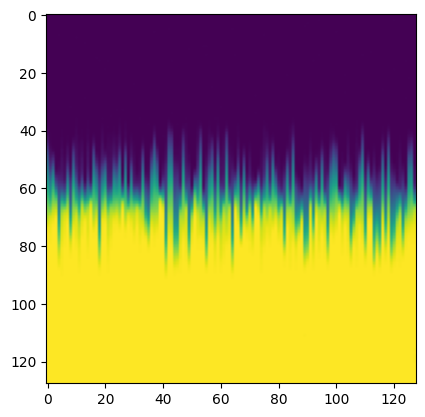

In [3]:
import torch 
import matplotlib.pyplot as plt
ects = torch.load("../generated_ects_full.pt")


print(ects[0].min(),ects[0].max(),ects.shape)

plt.imshow(ects[0].squeeze())

print(ects[0])



In [4]:
with torch.no_grad():
    pts = model.model(ects).view(-1,2048,3).cpu()

pts.shape

torch.Size([20, 2048, 3])

In [ ]:
from plotting import plot_recon_3d
import pyvista as pv 
pv.set_jupyter_backend("trame")
plot_recon_3d(recon_pcs=pts.numpy(),ref_pcs=pts.numpy(),num_pc=15,offset=0)


Widget(value='<iframe src="http://localhost:35419/index.html?ui=P_0x7f7f68189600_0&reconnect=auto" class="pyvi…

In [6]:
import pyvista as pv

pl = pv.Plotter(
        shape=(8, 8),
        window_size=[1600, 1600],
        border=False,
        polygon_smoothing=True,
    )

for col in range(8):
    for row in range(8):
        # First plat
        pl.subplot(row, col)
        actor = pl.add_points(
            pts[2*(col * 8 + row)].numpy(),
            style="points",
            emissive=False,
            show_scalar_bar=False,
            render_points_as_spheres=True,
            color="lightgray",
            point_size=2,
            ambient=0.2,
            diffuse=0.8,
            specular=0.8,
            specular_power=40,
            smooth_shading=True,
        )
        
pl.background_color = "w"
pl.link_views()
pl.camera_position = "xy"
pos = pl.camera.position
pl.camera.position = (pos[0], pos[1] + 3, pos[2])
pl.camera.position = (5, 0, 0)
pl.camera.azimuth = 45
pl.camera.elevation = 30
# create a top down light
light = pv.Light(
    position=(0, 0, 0), positional=True, cone_angle=50, exponent=20, intensity=0.2
)
pl.add_light(light)
pl.camera.zoom(.4)
pl.show()

IndexError: index 20 is out of bounds for dimension 0 with size 20

In [8]:
from shapesynthesis.metrics.evaluation import compute_all_metrics

airplane_refs = torch.load("../results/vae_airplane_latent/references.pt").cpu()
s = torch.load("../results/vae_airplane_latent/stdevs.pt").cpu()
m = torch.load("../results/vae_airplane_latent/means.pt").cpu()

pts = pts[:405] * s + m

print(s.shape,m.shape)





Loaded compiled 3D CUDA chamfer distance


RuntimeError: The size of tensor a (20) must match the size of tensor b (405) at non-singleton dimension 0

In [7]:
from plotting import plot_recon_3d


plot_recon_3d(airplane_refs.cpu().numpy()*10,pts.numpy()*10,num_pc=13)

NameError: name 'airplane_refs' is not defined

In [ ]:
compute_all_metrics(pts,airplane_refs,batch_size=100)

100%|██████████| 405/405 [04:06<00:00,  1.65it/s]


{'lgan_mmd-CD': tensor(0.0002),
 'lgan_cov-CD': tensor(0.4667),
 'lgan_mmd_smp-CD': tensor(0.0005),
 'lgan_mmd-EMD': tensor(0.0035),
 'lgan_cov-EMD': tensor(0.4568),
 'lgan_mmd_smp-EMD': tensor(0.0061),
 '1-NN-CD-acc_t': tensor(0.6469),
 '1-NN-CD-acc_f': tensor(0.9062),
 '1-NN-CD-acc': tensor(0.7765),
 '1-NN-EMD-acc_t': tensor(0.5926),
 '1-NN-EMD-acc_f': tensor(0.7852),
 '1-NN-EMD-acc': tensor(0.6889)}